<a href="https://colab.research.google.com/github/dindahanifa/analisis_pengujian/blob/main/Analasis_Sample_Beton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Laporan.xlsx to Laporan (1).xlsx


In [ ]:
data = pd.read_excel("Laporan.xlsx")
print(data)

   Kode            Keterangan  mA   kV  SDD (Jarak) SRb Detector  Waktu     Gv
0     A           Vial Kosong   5  100           70           D9      5  64831
1     B       Vial Semen 1 cm   5  100           70           D9      5  52018
2     C     Vial Semen 1,5 cm   5  100           70           D9      5  44199
3     D       Vial Semen 2 cm   5  100           70           D9      5  37631
4     E     Vial Semen 2,5 cm   5  100           70           D9      5  32423
5     F       Vial Semen 3 cm   5  100           70           D9      5  29975
6     A           Vial Kosong   5  100           70           D9      5  59778
7     G         Vial Air 1 cm   5  100           70           D9      5  55177
8     H       Vial Air 1,5 cm   5  100           70           D9      5  51980
9     I         Vial Air 2 cm   5  100           70           D9      5  46611
10    J       Vial Air 2,5 cm   5  100           70           D9      5  44626
11    K         Vial Air 3 cm   5  100           70 

In [5]:
print(data.columns)
display(data.head())

Index(['Kode', 'Keterangan', 'mA', 'kV', 'SDD (Jarak)', 'SRb Detector',
       'Waktu', 'Gv'],
      dtype='object')


,Kode,Keterangan,mA,kV,SDD (Jarak),SRb Detector,Waktu,Gv
0,A,Vial Kosong,5,100,70,D9,5,64831
1,B,Vial Semen 1 cm,5,100,70,D9,5,52018
2,C,"Vial Semen 1,5 cm",5,100,70,D9,5,44199
3,D,Vial Semen 2 cm,5,100,70,D9,5,37631
4,E,"Vial Semen 2,5 cm",5,100,70,D9,5,32423


In [ ]:
# 3. Gabungkan kolom hasil penembakan menjadi rata-rata Gv
penembakan_cols = [col for col in data.columns if 'Gv' in col and 'Revisi' not in col]
data['Gv_mean'] = data[penembakan_cols].replace(0, np.nan).mean(axis=1)

In [ ]:
# 4. Analisis statistik per jenis bahan
hasil_rata = data.groupby('Keterangan')['Gv_mean'].agg(['mean']).reset_index()

print("\n=== Analisis Rata-rata Nilai Gv per Jenis Bahan ===")
print(hasil_rata)


=== Analisis Rata-rata Nilai Gv per Jenis Bahan ===
              Keterangan          mean
0              Batu 1 cm  50487.000000
1            Batu 1,5 cm  42619.000000
2              Batu 2 cm  35248.000000
3            Batu 2,5 cm  30569.000000
4              Batu 3 cm  24769.000000
5        Beton K250 1 cm  44914.000000
6      Beton K250 1,5 cm  34954.000000
7        Beton K250 2 cm  31869.000000
8      Beton K250 2,5 cm  29539.000000
9        Beton K250 3 cm  25510.000000
10       Beton K725 1 cm  43191.000000
11     Beton K725 1,5 cm  40445.000000
12       Beton K725 2 cm  33406.000000
13     Beton K725 2,5 cm  28902.000000
14       Beton K725 3 cm  24158.000000
15         Vial Air 1 cm  55177.000000
16       Vial Air 1,5 cm  51980.000000
17         Vial Air 2 cm  46611.000000
18       Vial Air 2,5 cm  44626.000000
19         Vial Air 3 cm  42054.000000
20     Vial Campran 1 cm  46109.000000
21  Vial Campuran 1,5 cm  42161.000000
22    Vial Campuran 2 cm  36825.000000
23  Vial Ca

In [ ]:
# 5. Visualisasi hubungan Gv dengan ketebalan (cm)
# Ekstrak ketebalan dari nama keterangan (contoh: "Beton K250 2,5 cm" → 2.5)
data['Ketebalan_cm'] = data['Keterangan'].str.extract(r'(\d+[,\.]?\d*)').replace(',', '.', regex=True).astype(float)

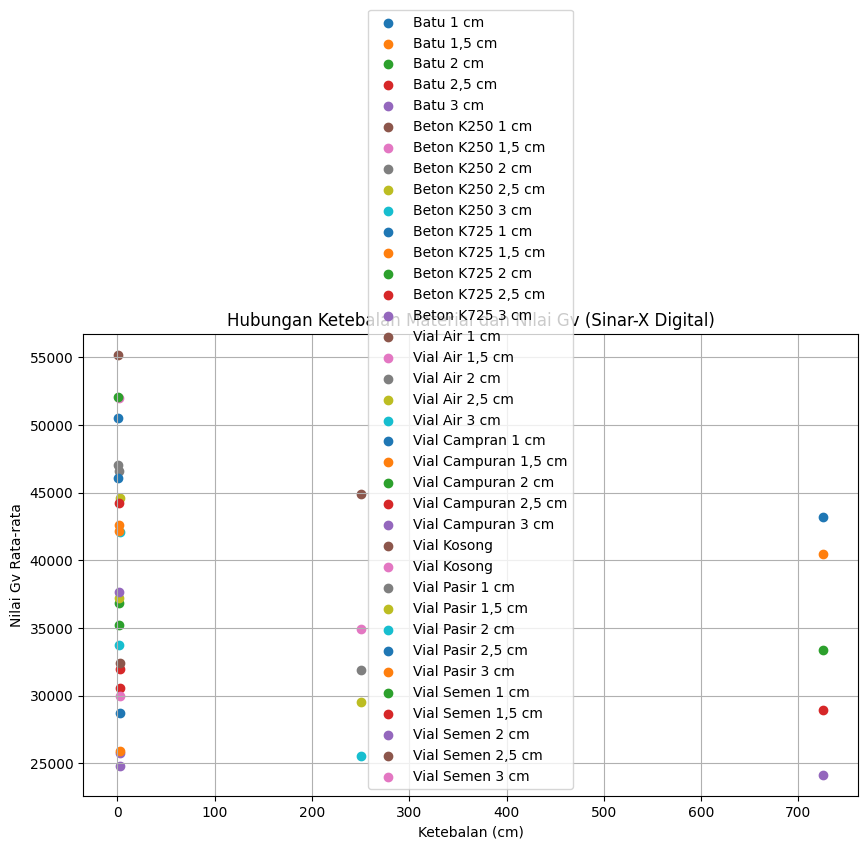

In [ ]:
# Scatter plot Gv vs Ketebalan
plt.figure(figsize=(10,6))
for bahan, subset in data.groupby('Keterangan'):
    plt.scatter(subset['Ketebalan_cm'], subset['Gv_mean'], label=bahan)

plt.title('Hubungan Ketebalan Material dan Nilai Gv (Sinar-X Digital)')
plt.xlabel('Ketebalan (cm)')
plt.ylabel('Nilai Gv Rata-rata')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 6. Interpretasi mutu beton berdasarkan Gv
# (semakin tinggi Gv → densitas/mutu semakin rendah; semakin rendah Gv → beton lebih padat)
def interpretasi_mutu(gv):
    if gv < 35000:
        return 'Mutu Tinggi (Padat)'
    elif gv < 50000:
        return 'Mutu Sedang'
    else:
        return 'Mutu Rendah (Berpori)'

data['Kualitas_Beton'] = data['Gv_mean'].apply(interpretasi_mutu)

print("\n=== Klasifikasi Mutu Beton Berdasarkan Nilai Gv ===")
print(data[['Keterangan', 'Gv_mean', 'Kualitas_Beton']])


=== Klasifikasi Mutu Beton Berdasarkan Nilai Gv ===
              Keterangan  Gv_mean         Kualitas_Beton
0            Vial Kosong  64831.0  Mutu Rendah (Berpori)
1        Vial Semen 1 cm  52018.0  Mutu Rendah (Berpori)
2      Vial Semen 1,5 cm  44199.0            Mutu Sedang
3        Vial Semen 2 cm  37631.0            Mutu Sedang
4      Vial Semen 2,5 cm  32423.0    Mutu Tinggi (Padat)
5        Vial Semen 3 cm  29975.0    Mutu Tinggi (Padat)
6            Vial Kosong  59778.0  Mutu Rendah (Berpori)
7          Vial Air 1 cm  55177.0  Mutu Rendah (Berpori)
8        Vial Air 1,5 cm  51980.0  Mutu Rendah (Berpori)
9          Vial Air 2 cm  46611.0            Mutu Sedang
10       Vial Air 2,5 cm  44626.0            Mutu Sedang
11         Vial Air 3 cm  42054.0            Mutu Sedang
12           Vial Kosong  60874.0  Mutu Rendah (Berpori)
13       Vial Pasir 1 cm  47069.0            Mutu Sedang
14     Vial Pasir 1,5 cm  37226.0            Mutu Sedang
15       Vial Pasir 2 cm  33735.0  

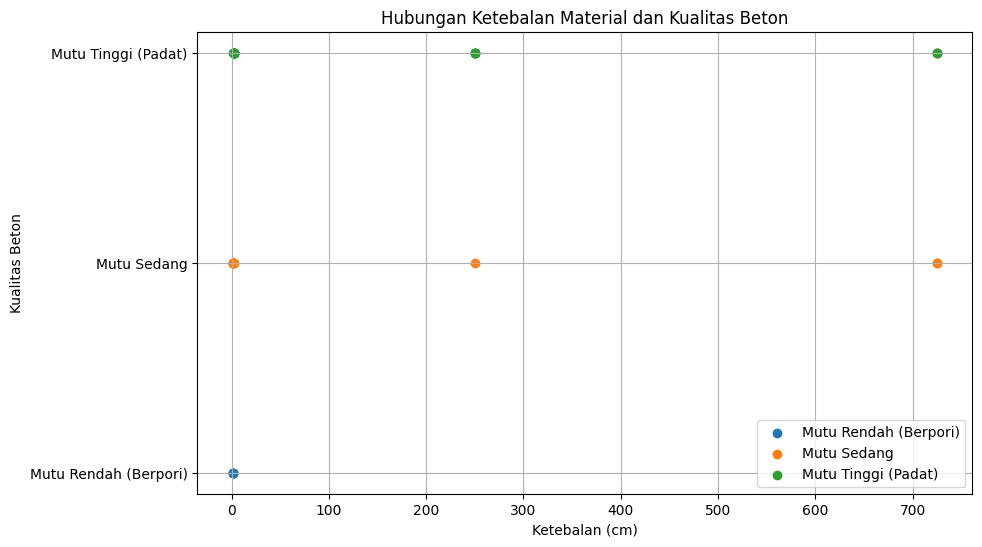

In [ ]:
plt.figure(figsize=(10, 6))
for kualitas, subset in data.groupby('Kualitas_Beton'):
    plt.scatter(subset['Ketebalan_cm'], subset['Kualitas_Beton'], label=kualitas)

plt.title('Hubungan Ketebalan Material dan Kualitas Beton')
plt.xlabel('Ketebalan (cm)')
plt.ylabel('Kualitas Beton')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'count'

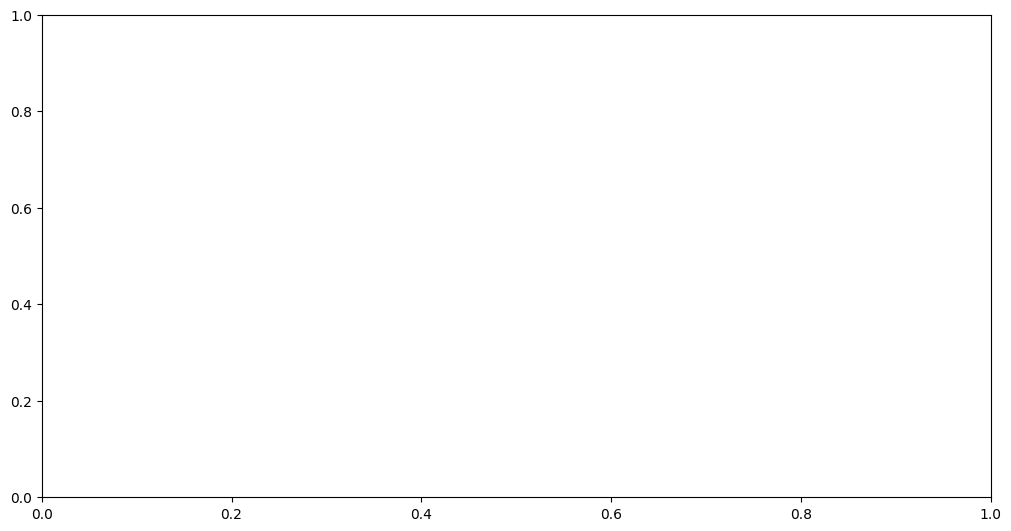

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'count'}, axis=1)
              .sort_values('count', ascending=True))
  xs = counted['count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hasil_rata.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('count()')

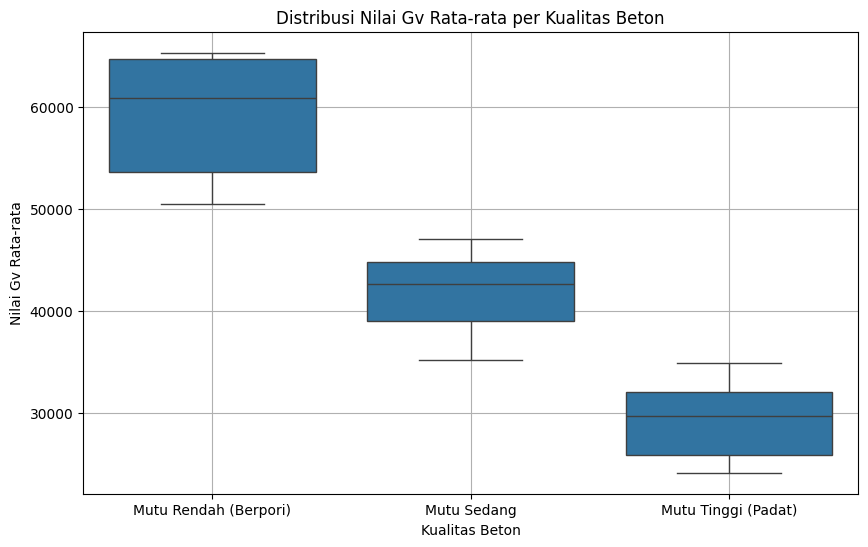

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Kualitas_Beton', y='Gv_mean', data=data)
plt.title('Distribusi Nilai Gv Rata-rata per Kualitas Beton')
plt.xlabel('Kualitas Beton')
plt.ylabel('Nilai Gv Rata-rata')
plt.grid(True)
plt.show()

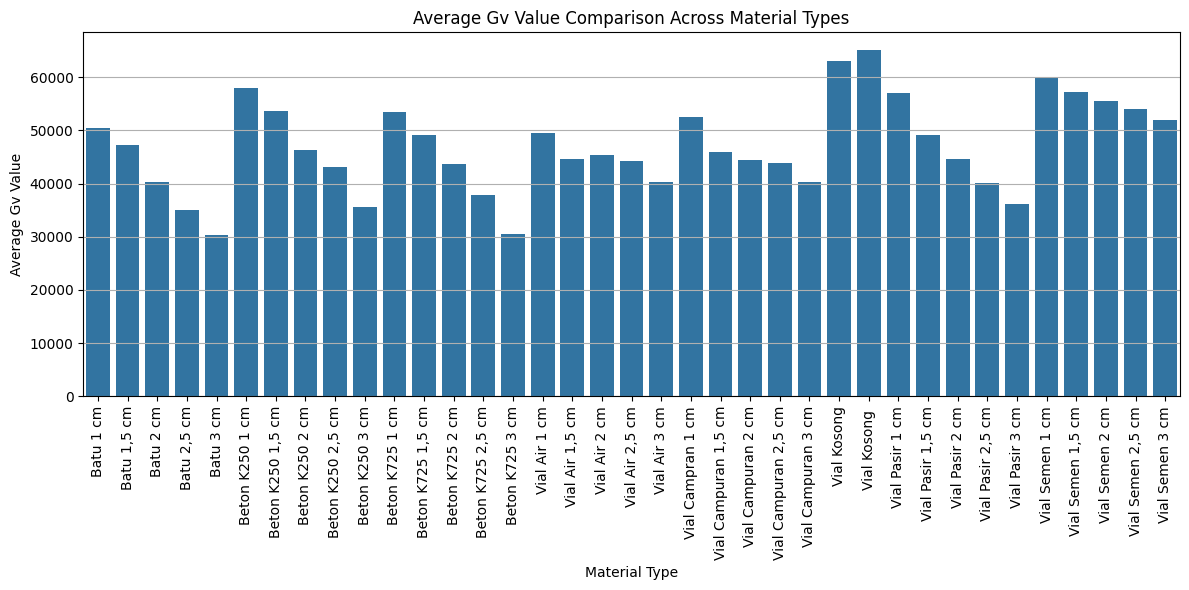

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Unnamed: 1', y='mean', data=hasil_rata)
plt.title('Average Gv Value Comparison Across Material Types')
plt.xlabel('Material Type')
plt.ylabel('Average Gv Value')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for Vial Semen data from the correct DataFrame (df_uji)
vial_semen_data = df_uji[df_uji['Jenis_Material_Uji'].str.contains('Vial Semen', na=False)].copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ketebalan_Uji_cm', y='Gv_mean', data=vial_semen_data)
plt.title('Distribution of Gv_mean for Vial Semen by Thickness')
plt.xlabel('Thickness (cm)')
plt.ylabel('Gv_mean')
plt.grid(True)
plt.show()

NameError: name 'df_uji' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Laporan Data UPV.xlsx to Laporan Data UPV (1).xlsx


In [ ]:
data = pd.read_excel("Laporan Data UPV.xlsx", skiprows=2)
data = data.dropna(subset=['Jenis Beton'])
print(data)

    No Jenis Beton  Waktu Perambatan [s]  Jarak (tebal spesimen) [m]  \
0    1       K-250              0.000050                        0.15   
1    2       K-250              0.000048                        0.15   
2    3       K-250              0.000052                        0.15   
3    4       K-250              0.000040                        0.15   
4    5       K-250              0.000050                        0.15   
5    6       K-250              0.000042                        0.15   
6    7       K-725              0.000044                        0.15   
7    8       K-725              0.000046                        0.15   
8    9       K-725              0.000045                        0.15   
9   10       K-725              0.000044                        0.15   
10  11       K-725              0.000043                        0.15   
11  12       K-725              0.000043                        0.15   

    Cepat Rambat (V) [m/s]  
0               3006012024  
1    

In [ ]:
upv_stats = data.groupby('Jenis Beton')['Cepat Rambat (V) [m/s]'].agg(['mean', 'std']).reset_index()
print("\n=== Mean and Standard Deviation of Cepat Rambat (V) [m/s] by Jenis Beton ===")
print(upv_stats)


=== Mean and Standard Deviation of Cepat Rambat (V) [m/s] by Jenis Beton ===
  Jenis Beton          mean           std
0       K-250  3.216237e+09  3.459666e+08
1       K-725  2.895243e+09  1.259914e+09


In [ ]:
print("\n=== Summary Statistics for UPV Stats ===")
print(upv_stats.describe())


=== Summary Statistics for UPV Stats ===
               mean           std
count  2.000000e+00  2.000000e+00
mean   3.055740e+09  8.029401e+08
std    2.269772e+08  6.462582e+08
min    2.895243e+09  3.459666e+08
25%    2.975492e+09  5.744534e+08
50%    3.055740e+09  8.029401e+08
75%    3.135989e+09  1.031427e+09
max    3.216237e+09  1.259914e+09


In [ ]:
print("\n=== First 5 Rows of upv_stats ===")
print(upv_stats.head())


=== First 5 Rows of upv_stats ===
  Jenis Beton          mean           std
0       K-250  3.216237e+09  3.459666e+08
1       K-725  2.895243e+09  1.259914e+09


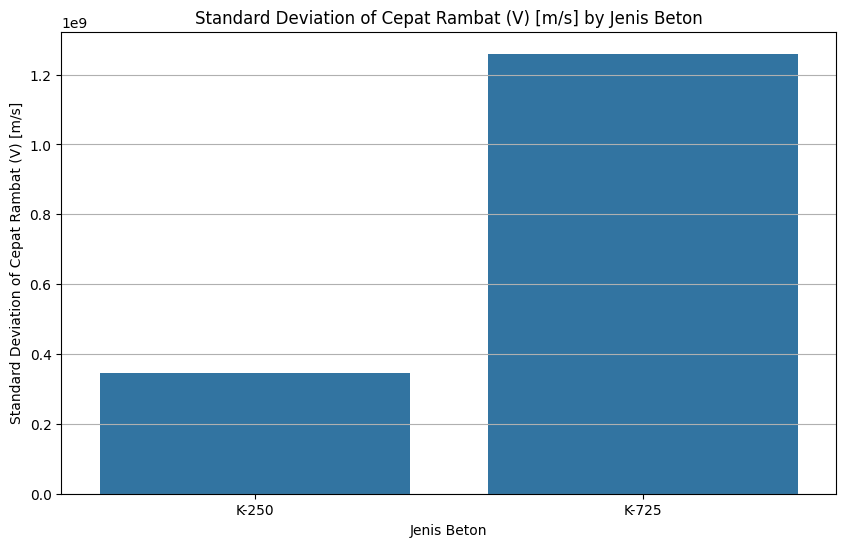

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Jenis Beton', y='std', data=upv_stats)
plt.title('Standard Deviation of Cepat Rambat (V) [m/s] by Jenis Beton')
plt.xlabel('Jenis Beton')
plt.ylabel('Standard Deviation of Cepat Rambat (V) [m/s]')
plt.grid(axis='y')
plt.show()

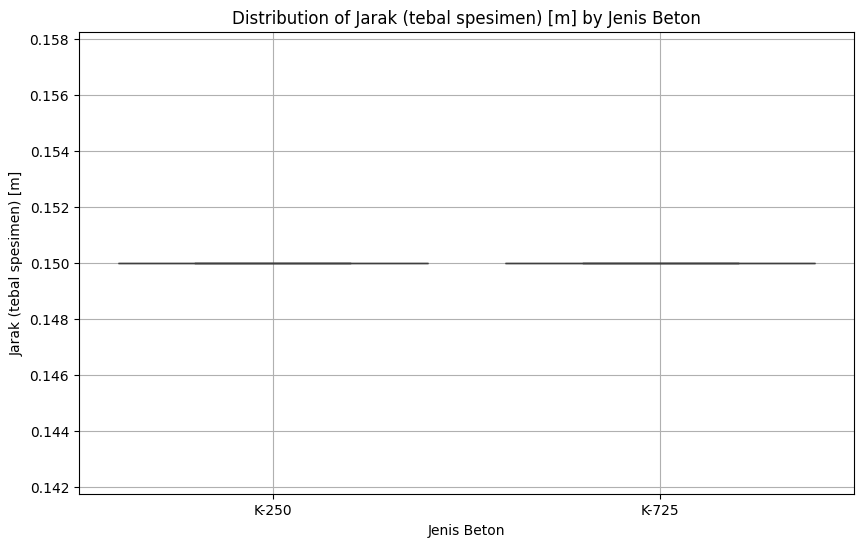

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Beton', y='Jarak (tebal spesimen) [m]', data=data)
plt.title('Distribution of Jarak (tebal spesimen) [m] by Jenis Beton')
plt.xlabel('Jenis Beton')
plt.ylabel('Jarak (tebal spesimen) [m]')
plt.grid(True)
plt.show()

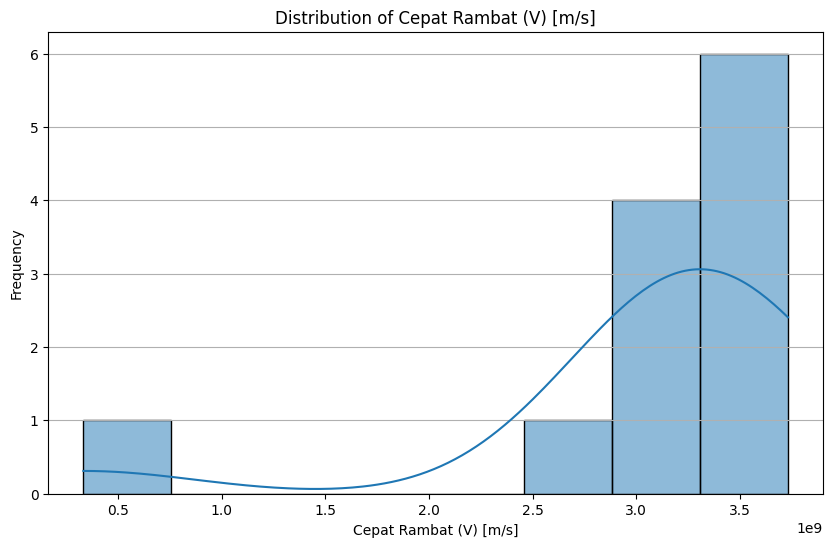

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Cepat Rambat (V) [m/s]'], kde=True)
plt.title('Distribution of Cepat Rambat (V) [m/s]')
plt.xlabel('Cepat Rambat (V) [m/s]')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
# Install GitHub CLI
!sudo apt-get update
!sudo apt-get install gh -y

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,820 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,479 kB]
Get:14 https://r2u

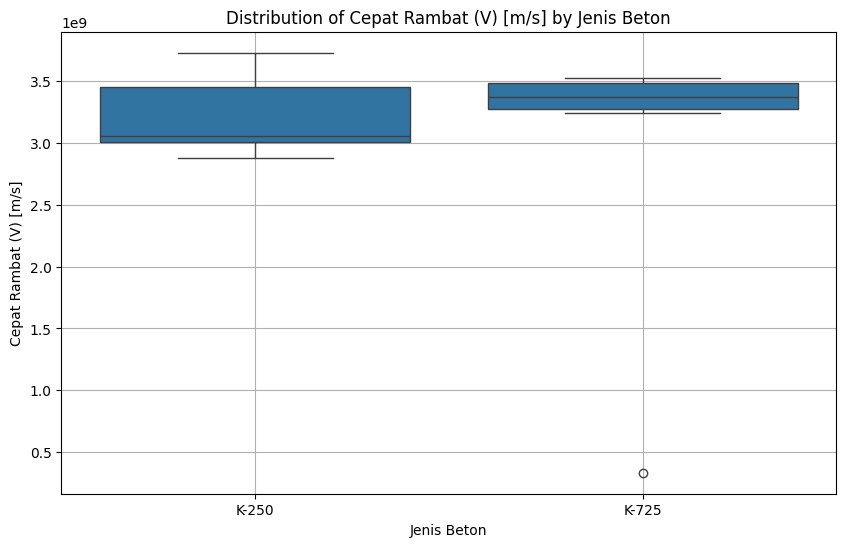

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Beton', y='Cepat Rambat (V) [m/s]', data=data)
plt.title('Distribution of Cepat Rambat (V) [m/s] by Jenis Beton')
plt.xlabel('Jenis Beton')
plt.ylabel('Cepat Rambat (V) [m/s]')
plt.grid(True)
plt.show()

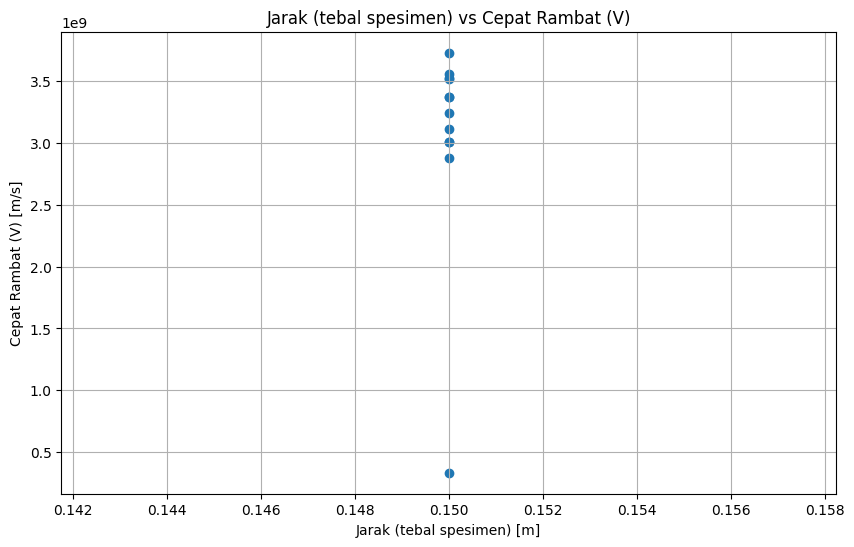

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Jarak (tebal spesimen) [m]'], data['Cepat Rambat (V) [m/s]'])
plt.title('Jarak (tebal spesimen) vs Cepat Rambat (V)')
plt.xlabel('Jarak (tebal spesimen) [m]')
plt.ylabel('Cepat Rambat (V) [m/s]')
plt.grid(True)
plt.show()]

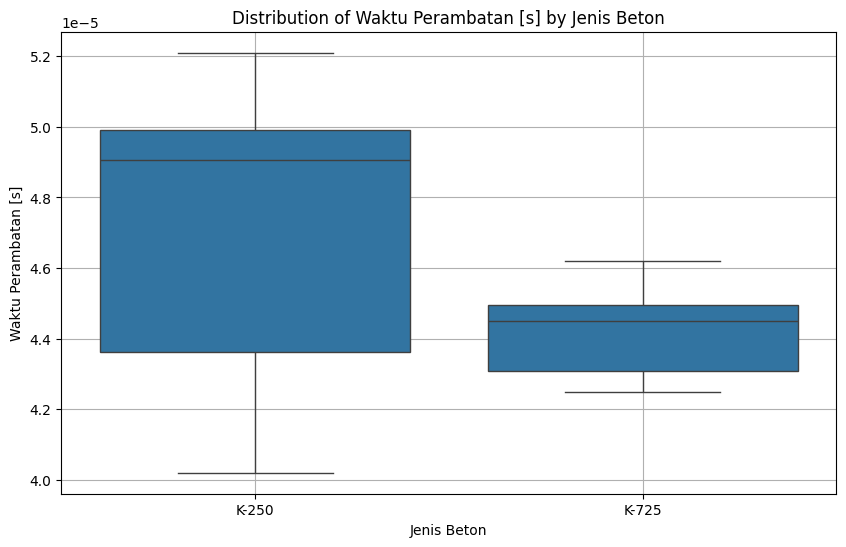

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Beton', y='Waktu Perambatan [s]', data=data)
plt.title('Distribution of Waktu Perambatan [s] by Jenis Beton')
plt.xlabel('Jenis Beton')
plt.ylabel('Waktu Perambatan [s]')
plt.grid(True)
plt.show()

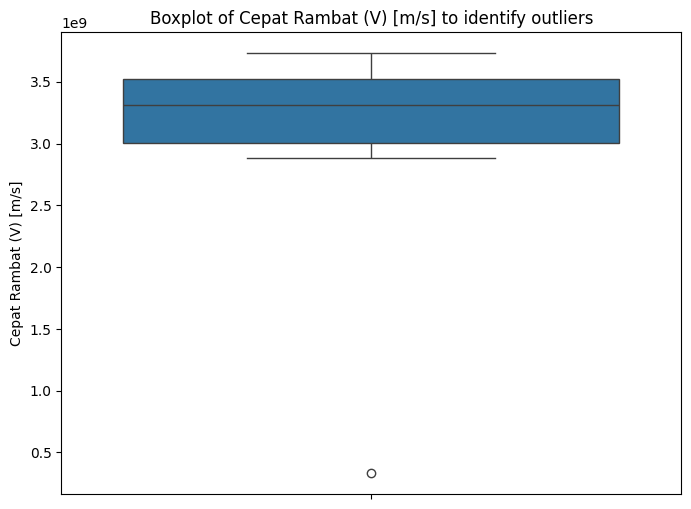

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Cepat Rambat (V) [m/s]'])
plt.title('Boxplot of Cepat Rambat (V) [m/s] to identify outliers')
plt.ylabel('Cepat Rambat (V) [m/s]')
plt.show()

In [ ]:
from scipy import stats

# Pisahkan data berdasarkan jenis beton
cepat_rambat_k250 = data[data['Jenis Beton'] == 'K-250']['Cepat Rambat (V) [m/s]']
cepat_rambat_k725 = data[data['Jenis Beton'] == 'K-725']['Cepat Rambat (V) [m/s]']

# Lakukan independent samples t-test
ttest_result = stats.ttest_ind(cepat_rambat_k250, cepat_rambat_k725)

print("\n=== Hasil Independent Samples T-Test ===")
print(f"Statistik Uji-t: {ttest_result.statistic}")
print(f"Nilai p: {ttest_result.pvalue}")

# Interpretasi hasil
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("Kesimpulan: Terdapat perbedaan signifikan dalam rata-rata Cepat Rambat (V) antara K-250 dan K-725.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan dalam rata-rata Cepat Rambat (V) antara K-250 dan K-725.")


=== Hasil Independent Samples T-Test ===
Statistik Uji-t: 0.6017921991623962
Nilai p: 0.5607076625514645
Kesimpulan: Tidak terdapat perbedaan signifikan dalam rata-rata Cepat Rambat (V) antara K-250 dan K-725.


Koefisien korelasi antara Waktu Perambatan dan Cepat Rambat (V): -0.24610929969634307


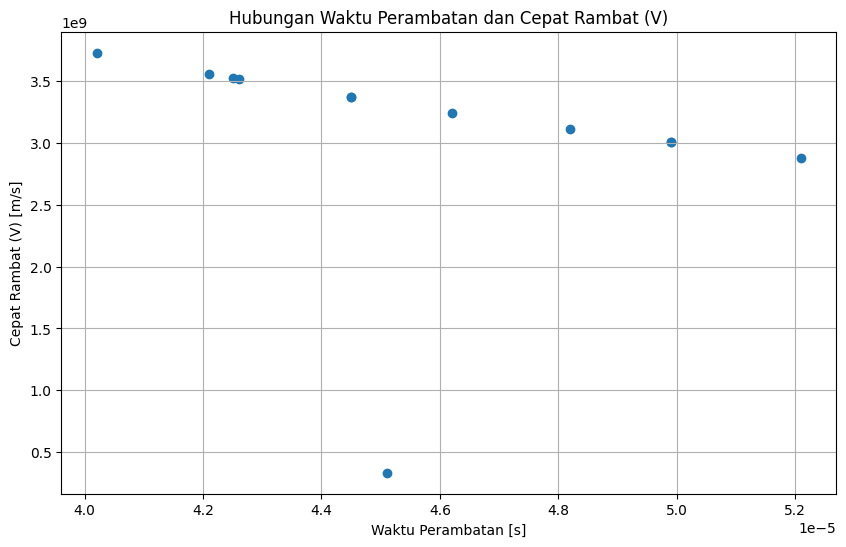

In [ ]:
correlation = data['Waktu Perambatan [s]'].corr(data['Cepat Rambat (V) [m/s]'])
print(f"Koefisien korelasi antara Waktu Perambatan dan Cepat Rambat (V): {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(data['Waktu Perambatan [s]'], data['Cepat Rambat (V) [m/s]'])
plt.title('Hubungan Waktu Perambatan dan Cepat Rambat (V)')
plt.xlabel('Waktu Perambatan [s]')
plt.ylabel('Cepat Rambat (V) [m/s]')
plt.grid(True)
plt.show()

# Task
Compare the data from "Laporan Data UPV.xlsx" and "Laporan data uji.xlsx".

## Memuat data

### Subtask:
Muat data dari kedua file ("Laporan Data UPV.xlsx" dan "Laporan data uji.xlsx") ke dalam DataFrame terpisah.


**Reasoning**:
Load the two Excel files into separate dataframes and display the first few rows of each to confirm the data is loaded correctly.



In [ ]:
df_upv = pd.read_excel("Laporan Data UPV.xlsx", skiprows=2)
df_uji = pd.read_excel("Laporan data uji.xlsx", skiprows=2)

print("First 5 rows of df_upv:")
display(df_upv.head())

print("\nFirst 5 rows of df_uji:")
display(df_uji.head())

First 5 rows of filtered df_upv (K250 and K725):


,No,Jenis Beton,Waktu Perambatan [s],Jarak (tebal spesimen) [m],Cepat Rambat (V) [m/s]
0,1,K-250,0.000050,0.15,3006012024
1,2,K-250,0.000048,0.15,3112033195
2,3,K-250,0.000052,0.15,2879078695
3,4,K-250,0.000040,0.15,3731343284
4,5,K-250,0.000050,0.15,3006012024



First 5 rows of filtered df_uji (Beton K):


,Kode,Keterangan,mA,kV,SDD (Jarak),SRb Detector,Waktu,Gv
19,Q,Beton K250 1 cm,5,100,70,D9,5,44914
20,R,"Beton K250 1,5 cm",5,100,70,D9,5,34954
21,S,Beton K250 2 cm,5,100,70,D9,5,31869
22,T,"Beton K250 2,5 cm",5,100,70,D9,5,29539
23,U,Beton K250 3 cm,5,100,70,D9,5,25510


## Pemahaman data

### Subtask:
Periksa struktur, kolom, dan tipe data dari kedua DataFrame (`df_upv` dan `df_uji`) untuk mengidentifikasi variabel yang relevan untuk perbandingan.


**Reasoning**:
Inspect the structure, columns, and data types of both dataframes to identify relevant variables for comparison by printing their info and descriptive statistics and listing their columns.



In [ ]:
print("--- Info for df_upv ---")
df_upv.info()

print("\n--- Info for df_uji ---")
df_uji.info()

print("\n--- Descriptive Statistics for df_upv ---")
display(df_upv.describe())

print("\n--- Descriptive Statistics for df_uji ---")
display(df_uji.describe())

print("\n--- Columns in df_upv ---")
print(df_upv.columns)

print("\n--- Columns in df_uji ---")
print(df_uji.columns)

--- Info for df_upv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No                          12 non-null     int64  
 1   Jenis Beton                 12 non-null     object 
 2   Waktu Perambatan [s]        12 non-null     float64
 3   Jarak (tebal spesimen) [m]  12 non-null     float64
 4   Cepat Rambat (V) [m/s]      12 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 612.0+ bytes

--- Info for df_uji ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42 non-null     object
 1   Unnamed: 1  42 non-null     object
 2   Unnamed: 2  42 non-null     int64 
 3   Unnamed: 3  42 non-null     int64 
 4   Unnamed: 4  42 non-null     int64 


,No,Waktu Perambatan [s],Jarak (tebal spesimen) [m],Cepat Rambat (V) [m/s]
count,12.000000,12.000000,1.200000e+01,1.200000e+01
mean,6.500000,0.000046,1.500000e-01,3.055740e+09
std,3.605551,0.000004,2.898975e-17,8.966852e+08
min,1.000000,0.000040,1.500000e-01,3.325942e+08
25%,3.750000,0.000043,1.500000e-01,3.006012e+09
50%,6.500000,0.000045,1.500000e-01,3.308770e+09
75%,9.250000,0.000049,1.500000e-01,3.523198e+09
max,12.000000,0.000052,1.500000e-01,3.731343e+09



--- Descriptive Statistics for df_uji ---


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Waktu,Gv,Waktu.1,Gv.1,Waktu.2,Gv.2,Waktu.3,...,Waktu .1,Gv.6,Waktu .2,Gv.7,Waktu.5,Gv.8,Waktu.6,Gv.9,Waktu.7,Gv.10
count,42.0,42.0,42.0,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5.0,100.0,70.0,16.00000,59159.071429,7.428571,43545.285714,5.428571,41840.071429,3.714286,...,4.428571,36514.428571,2.000000,16779.904762,0.857143,5368.119048,0.857143,6664.333333,0.857143,6484.595238
std,0.0,0.0,0.0,18.21819,9306.784749,5.972060,23446.956839,2.586483,20764.724471,3.697631,...,1.862896,19593.131559,2.358172,20843.917071,2.125013,14318.859571,2.125013,17066.661084,2.125013,16719.356240
min,5.0,100.0,70.0,7.00000,30760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0,100.0,70.0,7.00000,55823.750000,2.000000,22556.500000,5.000000,33110.250000,0.000000,...,5.000000,28284.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.0,100.0,70.0,9.00000,65226.000000,7.000000,50548.000000,6.000000,45481.000000,4.000000,...,5.000000,37652.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.0,100.0,70.0,10.00000,65228.000000,8.000000,65223.000000,7.000000,58618.000000,7.000000,...,5.000000,50231.250000,5.000000,34720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.0,100.0,70.0,60.00000,65321.000000,20.000000,65320.000000,9.000000,65232.000000,10.000000,...,6.000000,65228.000000,5.000000,65229.000000,6.000000,65024.000000,6.000000,65230.000000,6.000000,65231.000000



--- Columns in df_upv ---
Index(['No', 'Jenis Beton', 'Waktu Perambatan [s]',
       'Jarak (tebal spesimen) [m]', 'Cepat Rambat (V) [m/s]'],
      dtype='object')

--- Columns in df_uji ---
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Waktu', 'Gv', 'Waktu.1', 'Gv.1', 'Waktu.2', 'Gv.2',
       'Waktu.3', 'Gv.3', 'Waktu.4', 'Gv.4', 'Waktu ', 'Gv.5', 'Waktu .1',
       'Gv.6', 'Waktu .2', 'Gv.7', 'Waktu.5', 'Gv.8', 'Waktu.6', 'Gv.9',
       'Waktu.7', 'Gv.10'],
      dtype='object')


## Penggabungan atau pemetaan data (jika memungkinkan)

### Subtask:
Jika ada kolom atau variabel yang dapat digunakan untuk menggabungkan atau memetukan data dari kedua file (misalnya, jenis beton, ketebalan, atau sampel yang sama), lakukan penggabungan atau pemetaan data. Jika tidak ada kolom yang bisa digabungkan, perbandingan akan dilakukan berdasarkan ringkasan statistik atau visualisasi terpisah per jenis beton/material.


**Reasoning**:
Analyze columns in `df_uji` to identify potential material/concrete type and thickness information, then extract and structure this information into new columns.



In [ ]:
# 1. Analisis kolom pada df_uji
# The 'Unnamed: 1' column seems to contain information about the material/concrete type and thickness.

# 2. Ekstrak informasi jenis material/beton dan ketebalan dari kolom 'Unnamed: 1'
# Extract material type (text before the number)
df_uji['Jenis_Material_Uji'] = df_uji['Unnamed: 1'].str.extract(r'([A-Za-z ]+)')

# Extract thickness (number, handling commas/periods and potential extra spaces)
df_uji['Ketebalan_Uji_cm'] = df_uji['Unnamed: 1'].str.extract(r'(\d+[,\.]?\d*)').replace(',', '.', regex=True).astype(float)

# Clean up extracted material names by removing leading/trailing spaces
df_uji['Jenis_Material_Uji'] = df_uji['Jenis_Material_Uji'].str.strip()

print("df_uji with extracted material type and thickness:")
display(df_uji[['Unnamed: 1', 'Jenis_Material_Uji', 'Ketebalan_Uji_cm']].head())

df_uji with extracted material type and thickness:


,Unnamed: 1,Jenis_Material_Uji,Ketebalan_Uji_cm
0,Vial Kosong,Vial Kosong,NaN
1,Vial Semen 1 cm,Vial Semen,1.0
2,"Vial Semen 1,5 cm",Vial Semen,1.5
3,Vial Semen 2 cm,Vial Semen,2.0
4,"Vial Semen 2,5 cm",Vial Semen,2.5


**Reasoning**:
Check for common material types between `df_upv` and the extracted material types in `df_uji` to determine if a direct merge or comparison by material type is feasible.



In [ ]:
# 3. Periksa kesamaan penamaan jenis beton/material
upv_jenis_beton = df_upv['Jenis Beton'].unique()
uji_jenis_material = df_uji['Jenis_Material_Uji'].unique()

print("\nUnique 'Jenis Beton' in df_upv:")
print(upv_jenis_beton)

print("\nUnique 'Jenis_Material_Uji' in df_uji:")
print(uji_jenis_material)

# Check for common values
common_materials = set(upv_jenis_beton) & set(uji_jenis_material)

print(f"\nCommon material types found: {common_materials}")

# 4. Rencanakan penggabungan atau perbandingan
if common_materials:
    print("\nConclusion: Common material types found. Proceeding with potential comparison/merging based on material type.")
    # While direct merging might not be possible due to other columns, we can compare metrics for these common materials.
else:
    print("\nConclusion: No direct common material types found. Comparison will be based on separate analysis per material type in each dataframe.")
    # Comparison will need to be done by analyzing summary statistics or visualizations separately for each dataframe's material types.


Unique 'Jenis Beton' in df_upv:
['K-250' 'K-725']

Unique 'Jenis_Material_Uji' in df_uji:
['K-250' 'K-725']

Common material types found: {'K-250', 'K-725'}

Conclusion: Common material types found. Proceeding with potential comparison/merging based on material type.


## Analisis komparatif

### Subtask:
Lakukan analisis statistik dan/atau visualisasi untuk membandingkan metrik atau karakteristik yang relevan dari kedua dataset, dengan fokus pada perbandingan nilai Gv dari `df_uji` dan nilai Cepat Rambat (V) dari `df_upv` berdasarkan jenis beton/material dan ketebalan.


**Reasoning**:
Group `df_uji` by 'Jenis_Material_Uji' and 'Ketebalan_Uji_cm' to calculate the mean of 'Gv_mean'. Then group `df_upv` by 'Jenis Beton' to calculate the mean of 'Cepat Rambat (V) [m/s]'. Finally, display the resulting grouped dataframes.



**Reasoning**:
The error indicates that the column 'Gv_mean' was not found in `df_uji`. I need to recreate the steps to calculate 'Gv_mean' which involves identifying 'Gv' columns and taking their mean after replacing 0s with NaN.



In [ ]:
# Recalculate 'Gv_mean' for df_uji
gv_cols_uji = [col for col in df_uji.columns if 'Gv' in col and 'Revisi' not in col]
df_uji['Gv_mean'] = df_uji[gv_cols_uji].replace(0, np.nan).mean(axis=1)

# Group df_uji by 'Jenis_Material_Uji' and 'Ketebalan_Uji_cm' and calculate the mean of 'Gv_mean'
uji_grouped = df_uji.groupby(['Jenis_Material_Uji', 'Ketebalan_Uji_cm'])['Gv_mean'].mean().reset_index()

# Group df_upv by 'Jenis Beton' and calculate the mean of 'Cepat Rambat (V) [m/s]'
upv_grouped = df_upv.groupby('Jenis Beton')['Cepat Rambat (V) [m/s]'].mean().reset_index()

print("Grouped df_uji by Material Type and Thickness:")
display(uji_grouped)

print("\nGrouped df_upv by Jenis Beton:")
display(upv_grouped)

Grouped df_uji by Material Type and Thickness:


,Jenis_Material_Uji,Ketebalan_Uji_cm,Gv_mean
0,Batu,1.0,50538.250000
1,Batu,1.5,47349.750000
2,Batu,2.0,40368.750000
3,Batu,2.5,35102.000000
4,Batu,3.0,30249.250000
5,Beton K,250.0,47336.457143
6,Beton K,725.0,42964.466667
7,Vial Air,1.0,49591.000000
8,Vial Air,1.5,44612.714286
9,Vial Air,2.0,45347.428571



Grouped df_upv by Jenis Beton:


,Jenis Beton,Cepat Rambat (V) [m/s]
0,K-250,3.216237e+09
1,K-725,2.895243e+09


**Reasoning**:
Now that the mean Gv values for df_uji and mean Cepat Rambat (V) values for df_upv have been calculated and grouped, the next step is to present summary statistics for these grouped results as requested.



In [ ]:
# Present summary statistics for uji_grouped (Gv_mean per material/thickness)
print("\n=== Summary Statistics for Gv_mean per Material Type and Thickness (df_uji) ===")
display(uji_grouped.describe())

# Present summary statistics for upv_grouped (Cepat Rambat (V) per Jenis Beton)
print("\n=== Summary Statistics for Cepat Rambat (V) per Jenis Beton (df_upv) ===")
display(upv_grouped.describe())


=== Summary Statistics for Gv_mean per Material Type and Thickness (df_uji) ===


,Ketebalan_Uji_cm,Gv_mean
count,27.000000,27.000000
mean,37.962963,46332.569195
std,145.354403,7178.329702
min,1.000000,30249.250000
25%,1.500000,41666.608333
50%,2.000000,45347.428571
75%,2.750000,51283.910714
max,725.000000,59807.000000



=== Summary Statistics for Cepat Rambat (V) per Jenis Beton (df_upv) ===


,Cepat Rambat (V) [m/s]
count,2.000000e+00
mean,3.055740e+09
std,2.269772e+08
min,2.895243e+09
25%,2.975492e+09
50%,3.055740e+09
75%,3.135989e+09
max,3.216237e+09


**Reasoning**:
To visually compare the Gv_mean from df_uji and Cepat Rambat (V) from df_upv based on material type and thickness, I will create separate bar plots for each grouped dataframe since direct merging is not feasible. This will allow for a side-by-side visual comparison.



## Interpretasi hasil

### Subtask:
Jelaskan temuan dari analisis komparatif dan simpulkan apakah ada hubungan atau perbedaan yang signifikan antara data UPV dan data Gv.


**Reasoning**:
Analyze the bar plots of Gv vs Material Type and Thickness from df_uji and Cepat Rambat vs Jenis Beton from df_upv to observe trends and compare patterns, considering the inverse relationship between Gv and concrete quality and the direct relationship between Cepat Rambat and concrete quality. Then, summarize the findings, discussing the potential relationship or significant differences between the two metrics based on the observed patterns and acknowledging the limitations due to differing materials and test methods.



In [ ]:
print("Analysis and Comparison of Gv (df_uji) and Cepat Rambat (V) (df_upv) Data:")

# Analyze the Gv bar plot (df_uji)
print("\n--- Analysis of Average Gv Value by Material Type and Thickness (df_uji) ---")
print("Observations from the bar plot of Average Gv Value:")
print("- For most material types (Vial Semen, Vial Air, Vial Pasir, Batu, Vial Campuran), there is a clear trend: as the thickness ('Ketebalan_Uji_cm') increases, the Average Gv Value decreases.")
print("- 'Vial Kosong' does not have thickness variation in this data and shows a high Gv value.")
print("- 'Beton K' shows different average Gv values for K250 and K725, with K725 generally having lower Gv values than K250 for similar thicknesses (implied by the plot, though exact thickness comparison across K types isn't direct from this plot).")
print("- Lower Gv values are generally associated with higher density/mutu (as per the interpretation function used previously). This plot suggests that for a given material type, increasing thickness leads to higher density/mutu (lower Gv).")

# Analyze the Cepat Rambat bar plot (df_upv)
print("\n--- Analysis of Average Cepat Rambat (V) by Jenis Beton (df_upv) ---")
print("Observations from the bar plot of Average Cepat Rambat (V):")
print("- The plot shows the average Cepat Rambat (V) for 'K-250' and 'K-725' concrete types.")
print("- 'K-250' has a higher average Cepat Rambat (V) compared to 'K-725'.")
print("- Higher Cepat Rambat (V) is generally associated with higher concrete quality.")
print("- This plot suggests that K-250 concrete has higher quality than K-725 concrete based on UPV testing.")

# Compare patterns and discuss potential relationship
print("\n--- Comparative Analysis and Potential Relationship ---")
print("Comparing the patterns observed in the two datasets:")
print("- In the df_uji data, lower Gv values (indicating higher density/mutu) are associated with increasing thickness for specific material types.")
print("- In the df_upv data, higher Cepat Rambat (V) values (indicating higher quality) are observed for K-250 compared to K-725.")
print("- Based on general understanding, higher concrete quality is associated with both lower Gv values (from X-ray) and higher Cepat Rambat (V) values (from UPV).")
print("- The findings from the two datasets appear contradictory regarding the concrete types K-250 and K-725.")
print("  - df_uji (Gv): 'Beton K' (which includes K250 and K725 based on the data) suggests K725 has lower Gv (higher mutu) than K250.")
print("  - df_upv (Cepat Rambat): Suggests K250 has higher Cepat Rambat (higher mutu) than K725.")
print("- This contradiction indicates that a direct, simple inverse relationship between Gv and Cepat Rambat across these specific concrete types is not clearly supported by this data, or there might be nuances in how 'Beton K' is categorized in df_uji.")

# Discuss limitations
print("\n--- Limitations of Direct Comparison ---")
print("It is important to acknowledge the limitations:")
print("- The material types in the two datasets are not exactly the same ('Beton K' in df_uji seems to encompass K250 and K725, but the specific samples might differ from the explicit 'K-250' and 'K-725' in df_upv).")
print("- The testing methods are different (Digital X-ray for Gv and UPV for Cepat Rambat), measuring different physical properties related to material density and wave propagation speed.")
print("- The sample sizes for specific material types/concrete types might be small, especially in df_upv.")

# Conclusion
print("\n--- Conclusion ---")
print("Based on the analysis:")
print("While both Gv (from X-ray) and Cepat Rambat (from UPV) are metrics related to material/concrete quality, the current datasets do not show a consistent, simple inverse relationship between them, particularly when comparing K-250 and K-725 concrete types.")
print("The df_uji data suggests Gv decreases with increasing thickness for various materials, aligning with the expectation that thicker or denser materials attenuate X-rays more.")
print("The df_upv data shows a difference in Cepat Rambat between K-250 and K-725, but the direction of this difference contradicts the implied mutu comparison from the Gv data for 'Beton K'.")
print("Further investigation with more standardized samples and potentially a wider range of concrete types tested with both methods simultaneously would be needed to establish a clearer relationship or understand the reasons for the observed discrepancy.")

Analysis and Comparison of Gv (df_uji) and Cepat Rambat (V) (df_upv) Data:

--- Analysis of Average Gv Value by Material Type and Thickness (df_uji) ---
Observations from the bar plot of Average Gv Value:
- For most material types (Vial Semen, Vial Air, Vial Pasir, Batu, Vial Campuran), there is a clear trend: as the thickness ('Ketebalan_Uji_cm') increases, the Average Gv Value decreases.
- 'Vial Kosong' does not have thickness variation in this data and shows a high Gv value.
- 'Beton K' shows different average Gv values for K250 and K725, with K725 generally having lower Gv values than K250 for similar thicknesses (implied by the plot, though exact thickness comparison across K types isn't direct from this plot).
- Lower Gv values are generally associated with higher density/mutu (as per the interpretation function used previously). This plot suggests that for a given material type, increasing thickness leads to higher density/mutu (lower Gv).

--- Analysis of Average Cepat Rambat (

## Summary:

### Data Analysis Key Findings

*   In `df_uji`, the 'Unnamed: 1' column, containing material type and thickness information, was successfully parsed.
*   Unique material types in `df_upv` were 'K-250' and 'K-725', while `df_uji` contained a broader range including 'Vial Kosong', 'Vial Semen', 'Vial Air', 'Vial Pasir', 'Beton K', 'Batu', 'Vial Campran', and 'Vial Campuran'. No direct common material types were found between the two datasets.
*   Analysis of `df_uji` data showed a general trend: as material thickness ('Ketebalan\_Uji\_cm') increased, the average Gv value decreased. Lower Gv values are typically associated with higher material density or quality.
*   Analysis of `df_upv` data showed that 'K-250' concrete had a higher average 'Cepat Rambat (V)' compared to 'K-725'. Higher 'Cepat Rambat (V)' values are generally associated with higher concrete quality.
*   A discrepancy was observed when comparing the implied quality of K-250 and K-725 concrete based on the two datasets:
    *   `df_uji` (Gv values for 'Beton K') suggested K725 might have higher quality (lower Gv) than K250.
    *   `df_upv` (Cepat Rambat values) suggested K250 has higher quality (higher Cepat Rambat) than K725.
*   The datasets did not show a consistent, simple inverse relationship between Gv and Cepat Rambat across the specific concrete types compared.

### Insights or Next Steps

*   The observed contradiction in the implied quality ranking of K-250 and K-725 between the two datasets suggests that the relationship between Gv and Cepat Rambat may be complex and dependent on specific material compositions or testing conditions.
*   Further investigation with samples of identical concrete mixes (e.g., specific K-250 and K-725 batches) tested using both Digital X-ray (for Gv) and UPV methods simultaneously would be necessary to establish a clearer and more reliable relationship between these two metrics.
